In [11]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/"
fname = "projection_hexa10000_mpi"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = False
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method
# df = pd.read_csv('./data/cdl-linear_mpi-openmp.csv')
##### Resultado para CentralDifferenceLinear Local Method - Multiplicate Operations
df = pd.read_csv('./data/projection_10000_hexa_mpi.csv', sep=";")
pd.set_option('expand_frame_repr', False)

#   Calculate SpeedUp
df["SpeedUp P1 - Overlapping"] = df.iloc[0]["P1 - Runtime (s)"]/df["P1 - Runtime (s)"]
df["SpeedUp P3 - Overlapping"] = df.iloc[0]["P3 - Runtime (s)"]/df["P3 - Runtime (s)"]
df["SpeedUp P6 - Overlapping"] = df.iloc[0]["P6 - Runtime (s)"]/df["P6 - Runtime (s)"]
df["SpeedUp P9 - Overlapping"] = df.iloc[0]["P9 - Runtime (s)"]/df["P9 - Runtime (s)"]

#   Calculate Efficiency
df["Efficiency P1 - Overlapping"] = df["SpeedUp P1 - Overlapping"]/df["Num. Nodes"]
df["Efficiency P3 - Overlapping"] = df["SpeedUp P3 - Overlapping"]/df["Num. Nodes"]
df["Efficiency P6 - Overlapping"] = df["SpeedUp P6 - Overlapping"]/df["Num. Nodes"]
df["Efficiency P9 - Overlapping"] = df["SpeedUp P9 - Overlapping"]/df["Num. Nodes"]
df

Num. Nodes  Num. DOFs (P1)  Num. DOFs (P3)  Num. DOFs (P6)  Num. DOFs (P9)  P1 - Runtime (s)  P3 - Runtime (s)  P6 - Runtime (s)  P9 - Runtime (s)  SpeedUp P1 - Overlapping  SpeedUp P3 - Overlapping  SpeedUp P6 - Overlapping  SpeedUp P9 - Overlapping  Efficiency P1 - Overlapping  Efficiency P3 - Overlapping  Efficiency P6 - Overlapping  Efficiency P9 - Overlapping
0            1           11466          282796         2210791         7403986          6.350000         50.940000        319.540000       1196.920000                  1.000000                  1.000000                  1.000000                  1.000000                     1.000000                     1.000000                     1.000000                     1.000000
1            2           11466          282796         2210791         7403986          3.372976         27.520963        175.235763        648.898754                  1.882610                  1.850953                  1.823486                  1.844540                     0.941305                     0.925476                     0.911743                     0.922270
2            4           11466          282796         2210791         7403986          1.897463         15.349213         95.973421        361.903290                  3.346574                  3.318737                  3.329463                  3.307292                     0.836643                     0.829684                     0.832366                     0.826823
3            8           11466          282796         2210791         7403986          1.058977          8.607998         53.303890        202.359442                  5.996353                  5.917752                  5.994684                  5.914822                     0.749544                     0.739719                     0.749336                     0.739353
4           16           11466          282796         2210791         7403986          0.639620          5.233228         32.735097        125.402849                  9.927770                  9.733954                  9.761389                  9.544600                     0.620486                     0.608372                     0.610087                     0.596537
5           32           11466          282796         2210791         7403986          0.409291          3.367804         20.954897         80.560559                 15.514634                 15.125583                 15.248942                 14.857394                     0.484832                     0.472674                     0.476529                     0.464294
6           64           11466          282796         2210791         7403986          0.266998          2.225927         13.794087         53.591727                 23.782950                 22.884848                 23.164998                 22.334044                     0.371609                     0.357576                     0.361953                     0.348969
7          128           11466          282796         2210791         7403986          0.170009          1.404031          8.799189         34.698104                 37.350964                 36.281250                 36.314710                 34.495257                     0.291804                     0.283447                     0.283709                     0.269494
8          256           11466          282796         2210791         7403986          0.117922          0.952646          6.113163         24.744295                 53.849155                 53.472119                 52.270813                 48.371554                     0.210348                     0.208875                     0.204183                     0.188951
9          512           11466          282796         2210791         7403986          0.082817          0.675342          4.329148         17.993589                 76.675079                 75.428450                 73.811290                 66.519247                     0.149756           

In [12]:
# print(df.columns)
aggregate_operations = {
    'Efficiency P1 - Overlapping':'max',
    'Efficiency P3 - Overlapping':'max',
    'Efficiency P6 - Overlapping':'max',
    'Efficiency P9 - Overlapping':'max'
}
df = df.groupby(['Num. Nodes'], as_index=False).agg(aggregate_operations)
df

Num. Nodes  Efficiency P1 - Overlapping  Efficiency P3 - Overlapping  Efficiency P6 - Overlapping  Efficiency P9 - Overlapping
0            1                     1.000000                     1.000000                     1.000000                     1.000000
1            2                     0.941305                     0.925476                     0.911743                     0.922270
2            4                     0.836643                     0.829684                     0.832366                     0.826823
3            8                     0.749544                     0.739719                     0.749336                     0.739353
4           16                     0.620486                     0.608372                     0.610087                     0.596537
5           32                     0.484832                     0.472674                     0.476529                     0.464294
6           64                     0.371609                     0.357576                     0.361953                     0.348969
7          128                     0.291804                     0.283447                     0.283709                     0.269494
8          256                     0.210348                     0.208875                     0.204183                     0.188951
9          512                     0.149756                     0.147321                     0.144163                     0.129920
10        1024                     0.095392                     0.093933                     0.091350                     0.080265

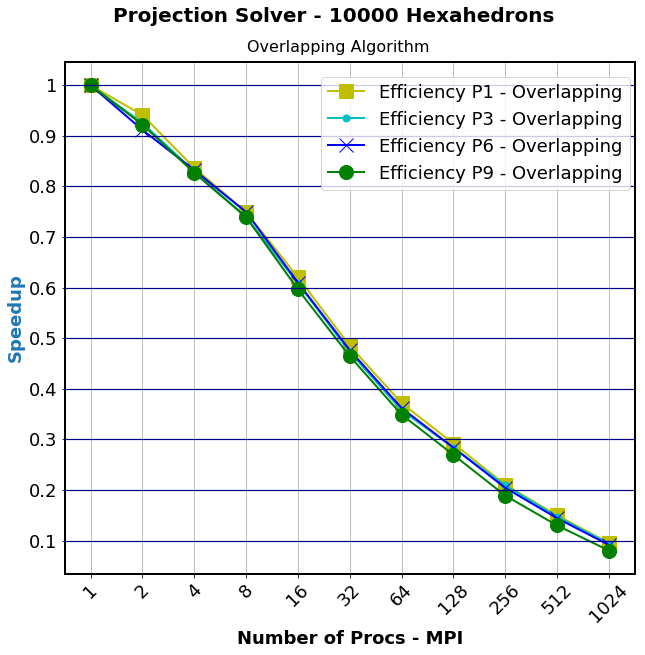

In [20]:
# fig = plt.subplots()
fig = plt.figure(figsize=(9,9))
color='tab:blue'
#   Plotar os valores dos graficos
plt.plot(df['Num. Nodes'], df['Efficiency P1 - Overlapping'], marker='s', markersize=14, color='y', linewidth=2)
plt.plot(df['Num. Nodes'], df['Efficiency P3 - Overlapping'], marker='.', markersize=14, color='c', linewidth=2)
plt.plot(df['Num. Nodes'], df['Efficiency P6 - Overlapping'], marker='x', markersize=14, color='b', linewidth=2)
plt.plot(df['Num. Nodes'], df['Efficiency P9 - Overlapping'], marker='o', markersize=14, color='g', linewidth=2)
#   Define a escala do grafico
plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], rotation=45)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

lines = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in lines:
    plt.axhline(i, linestyle='-', color='darkblue', linewidth='1.2') 


#   Plota os labels
plt.tight_layout()
title = 'Projection Solver - 10000 Hexahedrons'
subtitle = 'Overlapping Algorithm - Efficiency\n'
plt.suptitle(title, y=0.97, fontsize=20, fontweight='bold', ha='center', va='center')
plt.title(subtitle, x=0.48, fontsize=16, ha='center', va='center')
plt.subplots_adjust(top=0.90)
color='tab:blue'
plt.xlabel('Number of Procs - MPI', fontweight='bold', x=0.5, y=0.5)
plt.ylabel('Speedup', fontweight='bold', color=color)
#   Plota a legenda e o tamanho da figura
plt.legend(loc=(0.45, .75), frameon = True)
plt.grid()
plt.show()